## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
# Checking the number of mice.
num_mice = len(mouse_study_data['Mouse ID'].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
reduced_mice_data = mouse_study_data[['Mouse ID','Timepoint']]
duplicated_mice = reduced_mice_data.loc[reduced_mice_data.duplicated() == True]
duplicated_mice_id = pd.DataFrame(duplicated_mice['Mouse ID'].unique()).iloc[0,0]
duplicated_mice_id

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_data.loc[(mouse_study_data['Mouse ID'] == duplicated_mice_id)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_study_data.loc[(mouse_study_data['Mouse ID'] != duplicated_mice_id)]
cleaned_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_summary = pd.DataFrame({'Mean': [cleaned_mouse_data['Tumor Volume (mm3)'].mean()],
                                    'Median': cleaned_mouse_data['Tumor Volume (mm3)'].median(),
                                    'Variance': cleaned_mouse_data['Tumor Volume (mm3)'].var(),
                                    'Standard Deviation': cleaned_mouse_data['Tumor Volume (mm3)'].std(),
                                    'SEM': cleaned_mouse_data['Tumor Volume (mm3)'].sem()})
tumor_volume_summary

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = cleaned_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = cleaned_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = cleaned_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
st_devs = cleaned_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = cleaned_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

tumor_volume_summary_by_regmien = pd.DataFrame({'Tumor Volume Mean': means,
                                                'Tumor Volume Median': medians,
                                                'Tumor Volume Variance': variances,
                                                'Tumor Volume Standard Deviation': st_devs,
                                                'Tumor Volume SEM': sems})
tumor_volume_summary_by_regmien

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

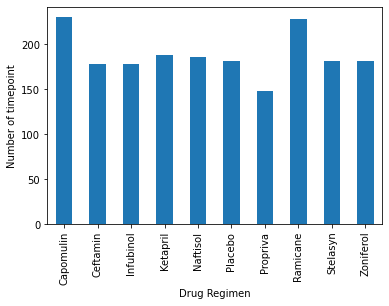

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
cleaned_mouse_data.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar', ylabel='Number of timepoint')
plt.show()

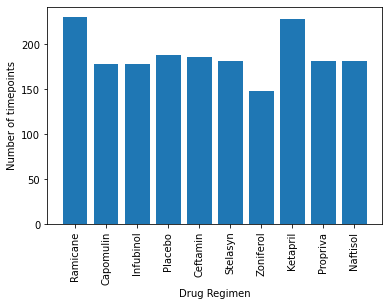

In [129]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = cleaned_mouse_data['Drug Regimen'].unique()
y_values = cleaned_mouse_data.groupby('Drug Regimen')['Timepoint'].count()

plt.bar(x_values, y_values, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of timepoints')
plt.xticks(rotation=90)
plt.show()

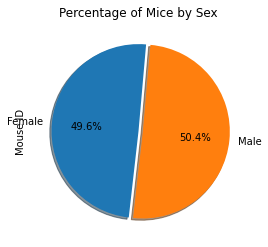

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# reduced table with mouse ids and sex
ids_and_sex = cleaned_mouse_data[['Mouse ID', 'Sex']].drop_duplicates()
counts_by_sex = ids_and_sex.groupby('Sex').count()
counts_by_sex
counts_by_sex['Mouse ID'].plot(kind='pie', explode = [0,0.05], autopct='%1.1f%%', title = 'Percentage of Mice by Sex', shadow=True, startangle=85)
plt.show()

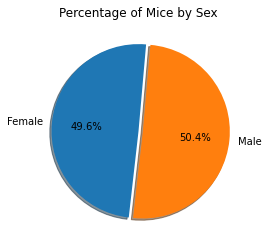

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = counts_by_sex['Mouse ID']
labels = counts_by_sex.index
explode = [0,0.05]

plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=85)
plt.title('Percentage of Mice by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = pd.DataFrame(cleaned_mouse_data.groupby('Mouse ID').max('Timepoint')['Timepoint'])
# last_timepoints = last_timepoints.rename(columns = {'Timepoint':'Final Timepoint'})
# final_volumes = cleaned_mouse_data.loc[(cleaned_mouse_data['Timepoint'] == 45),['Mouse ID','Timepoint']]
# final_volumes
# last_timepoints

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_data = pd.merge(cleaned_mouse_data, last_timepoints, on='Timepoint', how='inner')
merged_mouse_data
# final_volumes = merged_mouse_data.loc[]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,0,45.000000,0
2,k403,Ramicane,Male,21,16,0,45.000000,0
3,k403,Ramicane,Male,21,16,0,45.000000,0
4,k403,Ramicane,Male,21,16,0,45.000000,0
...,...,...,...,...,...,...,...,...
39991,z969,Naftisol,Male,9,30,45,73.867845,4
39992,z969,Naftisol,Male,9,30,45,73.867845,4
39993,z969,Naftisol,Male,9,30,45,73.867845,4
39994,z969,Naftisol,Male,9,30,45,73.867845,4


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
